# Homework 1
James Larsen

PHYSICS 514 -- Emmanuel Gull

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## ODE Integrators

### Analytical Solution

Analytically, we see that the solution to the given IVP is $x(t) = \sin(t)$ and $\dot{x}(t) = \cos(t)$. The plots are shown below as a function of time.

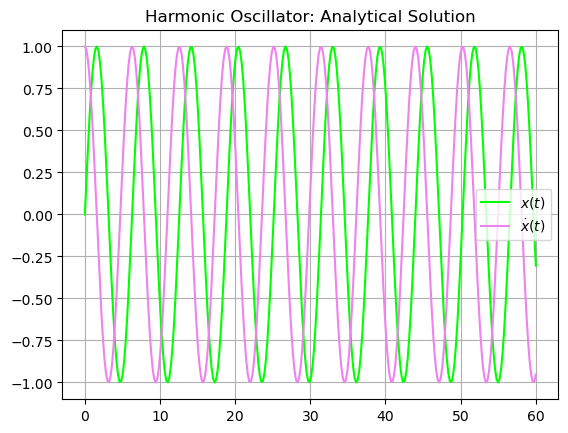

In [2]:
# compute values
tvals = np.linspace(0, 60, 300)
xvals = np.sin(tvals)
xdotvals = np.cos(tvals)

# plot results
plt.plot(tvals, xvals, c="lime", label=r"$x(t)$")
plt.plot(tvals, xdotvals, c="violet", label=r"$\dot{x}(t)$")

# format and show
plt.legend(loc="best")
plt.title("Harmonic Oscillator: Analytical Solution")
plt.grid()
plt.show()

### Forward Euler

For forward Euler, we can rewrite the second-order differential equation as a system of first-order differential equations:
\begin{equation}
\dot{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}} = \begin{bmatrix} x_2 \\ -x_1 \end{bmatrix},
\end{equation}
where $x_1 := x(t)$ and $x_2 := \dot{x}(t)$. Then, one iteration of the forward Euler method becomes
\begin{equation}
\begin{bmatrix} x_1^{n+1} \\ x_2^{n+1} \end{bmatrix} = \begin{bmatrix} x_1^n \\ x_2^n \end{bmatrix} + \Delta t \begin{bmatrix} x_2^n \\ -x_1^n \end{bmatrix}.
\end{equation}

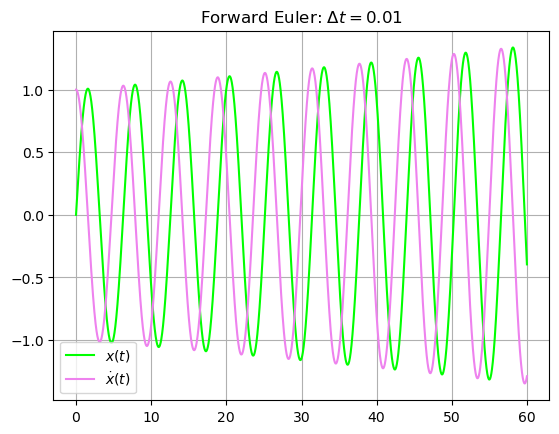

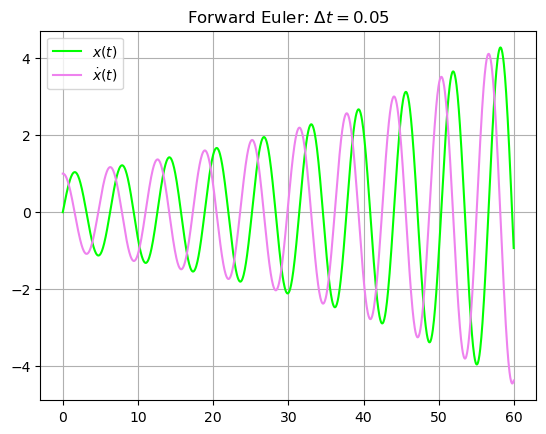

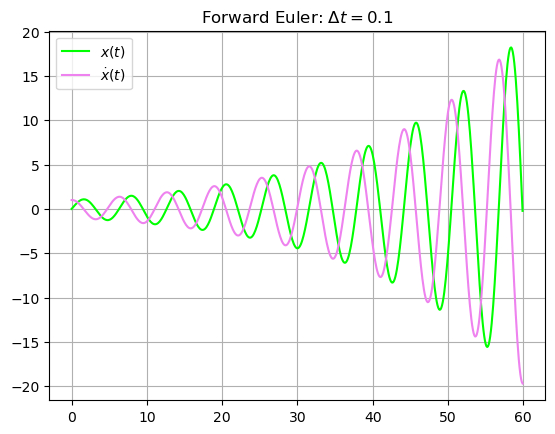

In [3]:
# initialize values
dts = [0.01, 0.05, 0.1]
numiters = [6000, 1200, 600]

# loop over each choice of dt
for i, dt in enumerate(dts):
    steps = numiters[i]
    xs = np.zeros((steps,2))
    xs[0,1] = 1
    tspan = np.arange(steps) * dt
    
    # iterate and plot
    for k in range(1, steps):
        xs[k] = xs[k-1] + dt * np.array([xs[k-1,1], -xs[k-1,0]])
    plt.plot(tspan, xs[:,0], c="lime", label=r"$x(t)$")
    plt.plot(tspan, xs[:,1], c="violet", label=r"$\dot{x}(t)$")
    
    # format and show
    plt.title(fr"Forward Euler: $\Delta t =${dt}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

This integrator is not stable and blows up the amplitude of the oscillations with time, so energy of the system is not conserved. We see that larger timesteps result in a more significant increase in the amplitude. Hence, this is not a suitable choice of integrator for the harmonic oscillator.

### Backward Euler

For backward Euler, we can rewrite the second-order differential equation as a system of first-order differential equations:
\begin{equation}
\dot{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}} = \begin{bmatrix} x_2 \\ -x_1 \end{bmatrix},
\end{equation}
where $x_1 := x(t)$ and $x_2 := \dot{x}(t)$. Then, one iteration of the backward Euler method becomes
\begin{equation}
\begin{bmatrix} x_1^{n+1} \\ x_2^{n+1} \end{bmatrix} = \begin{bmatrix} x_1^n \\ x_2^n \end{bmatrix} + \Delta t \begin{bmatrix} x_2^{n+1} \\ -x_1^{n+1} \end{bmatrix}.
\end{equation}
Note that the above equation is implicitly defined. We can thus solve the equation algebraically to find the following update rule:
\begin{align}
x_1^{n+1} &= \frac{x_1^n + \Delta t x_2^n}{1+\Delta t^2}, \\
x_2^{n+1} &= \frac{x_2^n - \Delta t x_1^n}{1+\Delta t^2}.
\end{align}

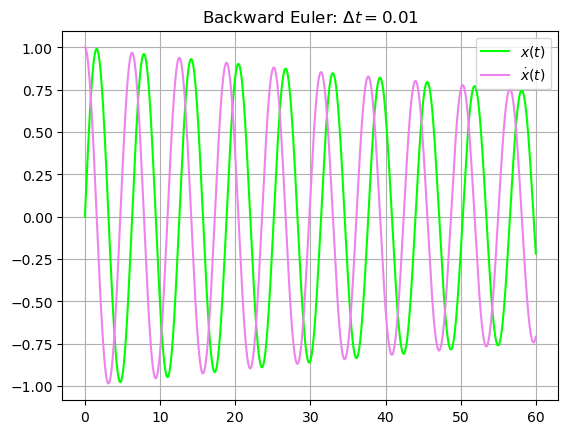

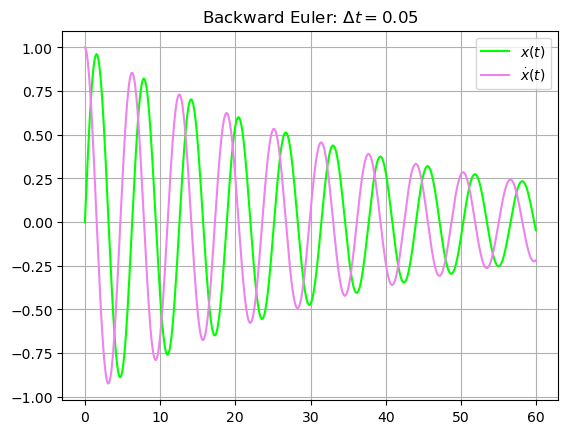

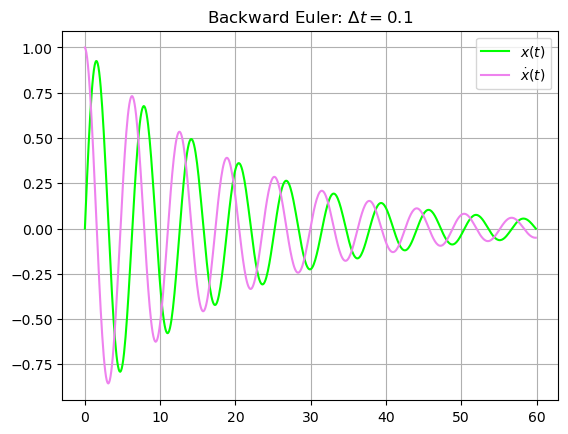

In [4]:
# initialize values
dts = [0.01, 0.05, 0.1]
numiters = [6000, 1200, 600]

# loop over each choice of dt
for i, dt in enumerate(dts):
    steps = numiters[i]
    xs = np.zeros((steps,2))
    xs[0,1] = 1
    tspan = np.arange(steps) * dt
    
    # iterate and plot
    for k in range(1, steps):
        xs[k] = np.array([xs[k-1,0] + dt*xs[k-1,1],
                          xs[k-1,1] - dt*xs[k-1,0]])  / (1+dt**2)
    plt.plot(tspan, xs[:,0], c="lime", label=r"$x(t)$")
    plt.plot(tspan, xs[:,1], c="violet", label=r"$\dot{x}(t)$")
    
    # format and show
    plt.title(fr"Backward Euler: $\Delta t =${dt}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

Note that while this integrator is stable in the mathematical sense, it damps the oscillations and does not conserve the energy of the system. We see that larger timesteps result in more significant damping. Hence, this is also not a suitable choice of integrator for the harmonic oscillator.

### Runge Kutta

First, note that $f(x) = \begin{bmatrix} x_2 \\ -x_1 \end{bmatrix}$. Therefore, the fourth-order Runge Kutta method is given by the following equations:
\begin{align}
    k_1 &= \Delta t f(x^n), \\
    k_2 &= \Delta t f(x^n + k_1/2), \\
    k_3 &= \Delta t f(x^n + k_2/2), \\
    k_4 &= \Delta t f(x^n + k_3), \\
    \begin{bmatrix} x_1^{n+1} \\ x_2^{n+1} \end{bmatrix} &= \begin{bmatrix} x_1^n \\ x_2^n \end{bmatrix} + \frac{k_1}{6} + \frac{k_2}{3} + \frac{k_3}{3} + \frac{k_4}{6}.
\end{align}

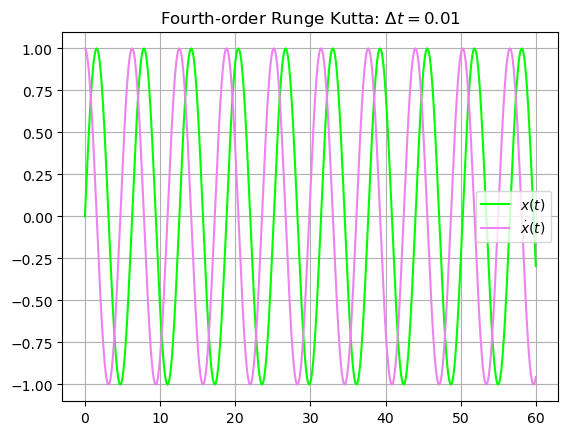

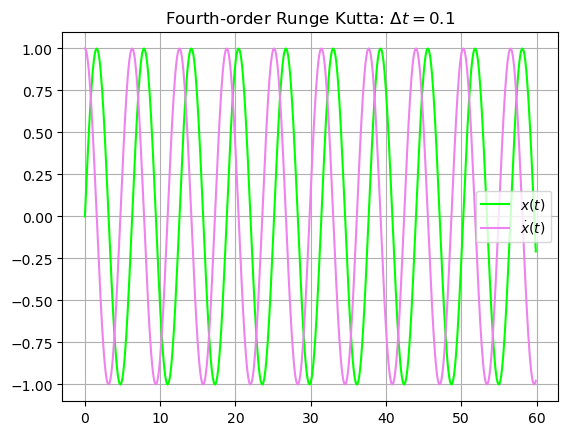

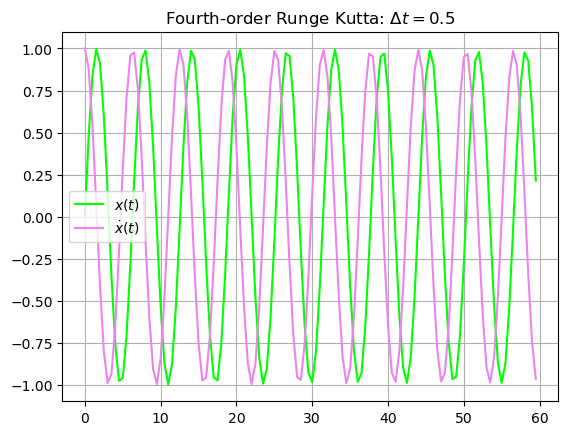

In [5]:
# initialize values
dts = [0.01, 0.1, 0.5]
numiters = [6000, 600, 120]

# loop over each choice of dt
for i, dt in enumerate(dts):
    steps = numiters[i]
    xs = np.zeros((steps,2))
    xs[0,1] = 1
    tspan = np.arange(steps) * dt
    
    # iterate and plot
    for j in range(1, steps):
        k1 = dt * np.array([xs[j-1,1], -xs[j-1,0]])
        k2 = dt * ( np.array([xs[j-1,1] + k1[1]/2, -xs[j-1,0] - k1[0]/2]) )
        k3 = dt * ( np.array([xs[j-1,1] + k2[1]/2, -xs[j-1,0] - k2[0]/2]) )
        k4 = dt * ( np.array([xs[j-1,1] + k3[1], -xs[j-1,0] - k3[0]]) )
        xs[j] = xs[j-1,:] + k1/6 + k2/3 + k3/3 + k4/6
    plt.plot(tspan, xs[:,0], c="lime", label=r"$x(t)$")
    plt.plot(tspan, xs[:,1], c="violet", label=r"$\dot{x}(t)$")
    
    # format and show
    plt.title(fr"Fourth-order Runge Kutta: $\Delta t =${dt}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

This integrator performs very well for this problem. Even for a very large timestep of $\Delta t = 0.5$, Runge Kutta still captures the main features of the oscillations and maintains the correct amplitude throughout. For smaller timesteps, the numerical solution is almost indistinguishable from the analytical solution. Fourth-order Runge Kutta is very suitable for the harmonic oscillator.

### Leapfrog

The leapfrog method evaluates the position and velocity at different times. We first need to jump-start the method with a step of forward Euler:
\begin{equation}
v_{1/2} = v_0 - \frac{x_0 \Delta t}{2}.
\end{equation}
We can then iteratively update the positions and velocities:
\begin{align}
    x_{n+1} &= x_n + v_{n+1/2} \Delta t, \\
    v_{n+3/2} &= v_{n+1/2} - x_{n+1} \Delta t.
\end{align}

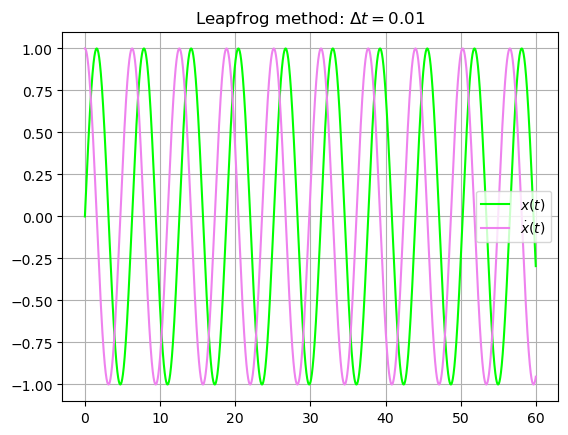

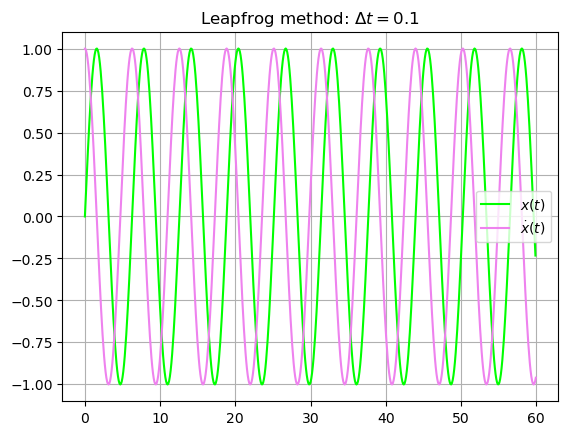

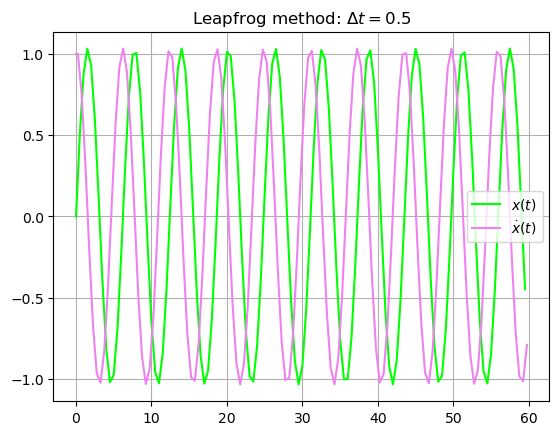

In [6]:
# initialize values
dts = [0.01, 0.1, 0.5]
numiters = [6000, 600, 120]

# loop over each choice of dt
for i, dt in enumerate(dts):
    steps = numiters[i]
    xs = np.zeros(steps)
    vs = np.zeros(steps+1)
    vs[0] = 1
    vs[1] = vs[0] - xs[0] * dt / 2
    xtspan = np.arange(steps) * dt
    vtspan = np.append(0, np.arange(steps) * dt + dt/2)
    
    # iterate and plot
    for k in range(1, steps):
        xs[k] = xs[k-1] + vs[k]*dt
        vs[k+1] = vs[k] - xs[k]*dt
    plt.plot(xtspan, xs, c="lime", label=r"$x(t)$")
    plt.plot(vtspan, vs, c="violet", label=r"$\dot{x}(t)$")
    
    # format and show
    plt.title(fr"Leapfrog method: $\Delta t =${dt}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

This integrator performs very well for this problem. Just as with Runge Kutta, the leapfrog method still captures the main features of the oscillations even for a very large timestep of $\Delta t = 0.5$ and maintains the correct amplitude throughout. For smaller timesteps, the numerical solution is almost indistinguishable from the analytical solution. The leapfrog method is very suitable for the harmonic oscillator.

## Shooting

Note that the trajectory of a cannon at the origin with initial velocity of magnitude $v_0$ and angle $\theta$ fired from the origin will trace out the following trajectory:
\begin{equation}
    y = x \tan \theta - \frac{g}{2v_0^2 \cos^2 \theta} x^2.
\end{equation}
We can take $v_0 = 150 \text{ m/s}$ and $g = 9.8 \text{ m/s}^2$. We want to find the angle $\theta$ such that the cannon lands 1.5 km away from the origin, i.e., we want the trajectory to pass through the point (1500, 0). Plugging these values into our trajectory equation, we get that
\begin{equation}
    0 = 1500 \tan \theta - \frac{9.8}{2 \cdot 150^2 \cos^2 \theta} 1500^2 = 1500 \tan \theta - 490 \sec^2 \theta = -490 \tan^2 \theta + 1500 \tan \theta - 490.
\end{equation}
We now use the bisection method to find the appropriate angle. This method can be summarized as follows:
1. Choose two endpoints $x_0$ and $x_1$ surrounding the desired root.
2. Define a mid-point $x_m = (x_0+x_1)/2$.
3. If $\text{sign}(f(x_m)) = \text{sign}(f(x_0))$, replace $x_0$ with $x_m$, otherwise replace $x_1$ with $x_m$.
4. Iterate until a root is found.

In [7]:
# initialize values
f = lambda x: -490 * np.tan(x)**2 + 1500 * np.tan(x) - 490
x0 = 0
x1 = np.pi/4

# bisection method
while x1-x0 > 1e-10:
    xm = (x0+x1) / 2
    if np.sign(f(xm)) == np.sign(f(x0)):
        x0 = xm
    else:
        x1 = xm

In [8]:
# verify root is found
f(xm)

-9.040377335622907e-10

Now that we have used the bisection method to find the appropriate angle, we plot the resulting cannon trajectory below.

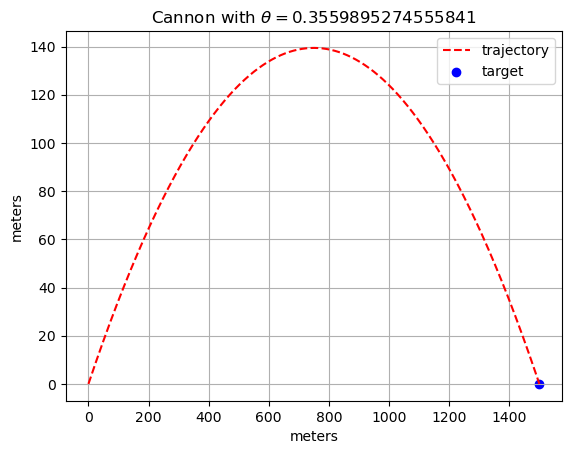

In [9]:
# initialize function
g = 9.8
v0 = 150
traj = np.vectorize( lambda x: x * np.tan(xm) - x**2 * g / (2 * v0**2 * np.cos(xm)**2) )
xvals = np.linspace(0, 1500, 3000)

# plot result
plt.plot(xvals, traj(xvals), "r--", label="trajectory")
plt.scatter([1500],[0], color="blue", label="target")
plt.xlabel("meters")
plt.ylabel("meters")
plt.title(fr"Cannon with $\theta = ${xm}")
plt.legend(loc="best")
plt.grid()
plt.show()

We chose to use the bisection method instead of the secant method because we knew the method was guaranteed to converge since the function of our angle was continuous and we had good upper and lower bound guesses. The secant method is not guaranteed to converge, and will often not converge for functions from trigonometry due to the oscillatory nature of these problems, causing rapidly varying derivatives. In practice, we would want to use the bisection method or *regula falsi* so that we have convergence guarantees as opposed to the Newton or secant methods. 